In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [4]:
X

array([[ 2.82586686, -0.29055733],
       [ 7.86915591, -7.55762446],
       [ 7.10087442, -7.61661842],
       ...,
       [ 7.76757559, -8.8357324 ],
       [ 2.62301596, -2.09349388],
       [ 7.36888851, -8.46384141]], shape=(1000, 2))

In [5]:
y

array([0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1,
       1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0,
       1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1,
       1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2,
       1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1,

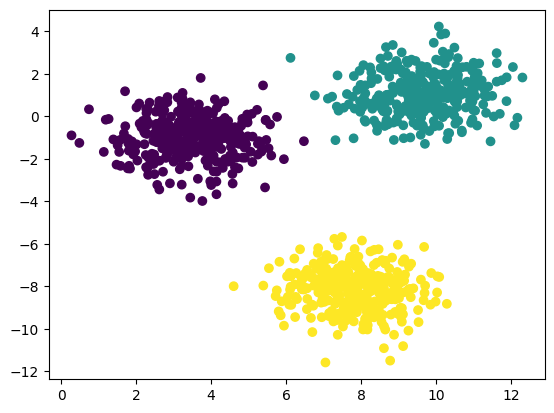

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
## standardization -- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method to select K Value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1339.9999999999995,
 752.2940855508577,
 131.11556337397332,
 112.42052352317708,
 89.61319815461036,
 70.00103685830109,
 63.690285442055675,
 59.74247829722552,
 52.82449968283628,
 47.8283860316076]

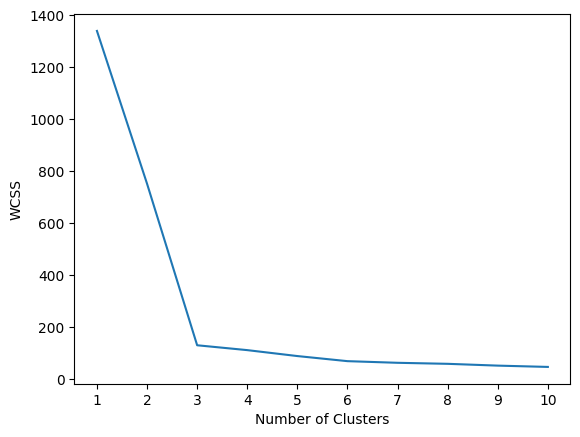

In [13]:
## Plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2,
       0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1,
       1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2,
       1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1,
       0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0,

In [16]:
y_pred = kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 1,
       0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1,
       1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0,
       2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1,
       2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1,
       0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2,
       2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 2, 2, 1,
       1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1,
       2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0,

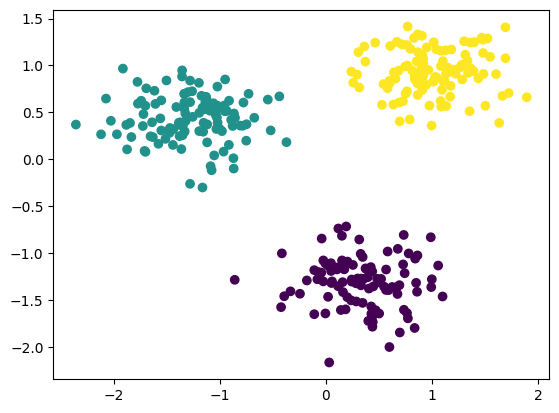

In [20]:
plt.scatter(X_test_scaled[:,0], X_test_scaled[:, 1], c=y_pred)

In [21]:
## Validating the k value
## kneelocater
## Silhoutee Scoring

In [22]:
## kneelocator
!pip install kneed

In [23]:
from kneed import KneeLocator

In [24]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

In [25]:
kl.elbow

np.int64(3)

In [27]:
## Silhouetee scoring
from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [31]:
silhouette_coefficients


[np.float64(0.4903752158701977),
 np.float64(0.7474474857247176),
 np.float64(0.6226967597724538),
 np.float64(0.5120462557304745),
 np.float64(0.39248652526261574),
 np.float64(0.3640625595083436),
 np.float64(0.3453942843471369),
 np.float64(0.3438051263356482),
 np.float64(0.332232946204319)]

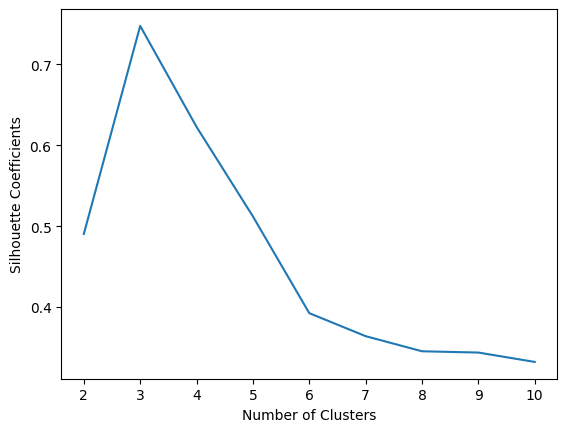

In [32]:
## plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

In [33]:
## choose the highest silhouette coeff